In [2]:
import pandas as pd
import geopandas as gpd

# Load data
park_gdf = gpd.read_file("Parks Zones_20240616.geojson")

manhattan_park_gdf=park_gdf[park_gdf['borough'] == 'M']



In [3]:
manhattan_park_gdf.shape

(255, 20)

In [4]:
manhattan_park_gdf.columns

Index(['propname', 'retireddate', 'zipcode', 'acres', 'location',
       'nys_assembly', 'councildistrict', 'description', 'us_congress',
       'gispropnum', 'retired', 'communityboard', 'department', 'subcategory',
       'precinct', 'omppropid', 'sitename', 'nys_senate', 'borough',
       'geometry'],
      dtype='object')

In [5]:
manhattan_park_gdf.dtypes

propname             object
retireddate          object
zipcode              object
acres                object
location             object
nys_assembly         object
councildistrict      object
description          object
us_congress          object
gispropnum           object
retired              object
communityboard       object
department           object
subcategory          object
precinct             object
omppropid            object
sitename             object
nys_senate           object
borough              object
geometry           geometry
dtype: object

In [6]:
#checking for duplicated rows
duplicate_rows = manhattan_park_gdf[manhattan_park_gdf.duplicated()]

#display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

#Results: there are no duplicated rows

Duplicate Rows:
Empty GeoDataFrame
Columns: [propname, retireddate, zipcode, acres, location, nys_assembly, councildistrict, description, us_congress, gispropnum, retired, communityboard, department, subcategory, precinct, omppropid, sitename, nys_senate, borough, geometry]
Index: []


In [7]:
manhattan_park_gdf.isnull().sum()

propname             0
retireddate        255
zipcode              0
acres                0
location             0
nys_assembly         0
councildistrict      0
description          0
us_congress          0
gispropnum           0
retired              0
communityboard       1
department           0
subcategory        255
precinct             0
omppropid            0
sitename           255
nys_senate           0
borough              0
geometry             0
dtype: int64

In [8]:
manhattan_park_gdf.head()

propname retireddate     zipcode        acres  \
0            Central Park        None       10024  28.25502865   
2            Central Park        None       10024  13.68595728   
3            Central Park        None  1002410025  11.00554979   
4            Sutton Parks        None       10022    0.3048409   
5  Washington Square Park        None       10011    4.9406729   

                                            location nys_assembly  \
0  West Drive To 92 St, Reservoir, East Drive, 97...       69, 68   
2          Reservoir, 90 St, 5 Ave, 97 St Transverse       69, 68   
3                 CPW, W 97 St, West Drive, W 100 St       69, 68   
4                         E 53 To E 54 St, Sutton Pl           73   
5  W 4th St, Waverly Pl, University Pl (E/o 5 Ave...           66   

  councildistrict                          description us_congress gispropnum  \
0               6   Central Park-Reservoir (Northwest)      10, 13       M010   
2               6   Central Park-Reservoir (Northeast)      10, 13       M010   
3               6                    Central Park West      10, 13       M010   
4               4    Sutton Place Pk-Sutton Place Park          12      M108P   
5               1  Washington Square Park Eastern Half          10       M098   

  retired communityboard department subcategory precinct  omppropid sitename  \
0   false            164       M-13        None       22  M010-ZN34     None   
2   false            164       M-13        None        3  M010-ZN33     None   
3   false            164       M-13        None       22  M010-ZN35     None   
4   false            106       M-06        None       17   M108P-03     None   
5   false            102       M-02        None        3  M098-ZN02     None   

  nys_senate borough                                           geometry  
0         29       M  MULTIPOLYGON (((-73.96358 40.79072, -73.96360 ...  
2         29       M  MULTIPOLYGON (((-73.95665 40.78916, -73.95701 ...  
3         29       M  MULTIPOLYGON (((-73.96241 40.79401, -73.96253 ...  
4         28       M  MULTIPOLYGON (((-73.96255 40.75484, -73.96252 ...  
5         27       M  MULTIPOLYGON (((-73.99756 40.73098, -73.99758 ...

In [9]:
manhattan_park_gdf['retired'].value_counts()
#all parks are still in use

retired
false    255
Name: count, dtype: int64

In [10]:
manhattan_park_gdf.dtypes

propname             object
retireddate          object
zipcode              object
acres                object
location             object
nys_assembly         object
councildistrict      object
description          object
us_congress          object
gispropnum           object
retired              object
communityboard       object
department           object
subcategory          object
precinct             object
omppropid            object
sitename             object
nys_senate           object
borough              object
geometry           geometry
dtype: object

<Axes: title={'center': 'Manhattan Park'}, xlabel='Categories', ylabel='Frequency'>

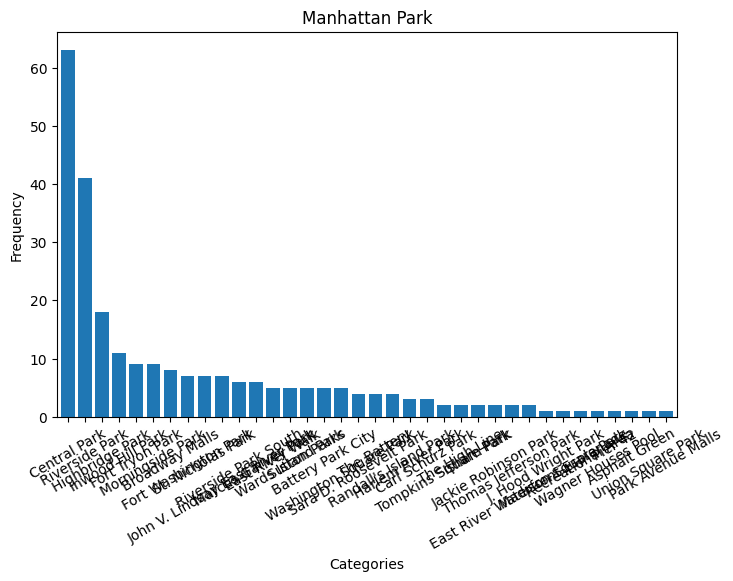

In [11]:
import matplotlib.pyplot as plt
propname=manhattan_park_gdf['propname'].value_counts(dropna = False).plot(kind='bar',figsize=(8,5),width=0.8)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Manhattan Park')
plt.xticks(rotation=30) 
propname


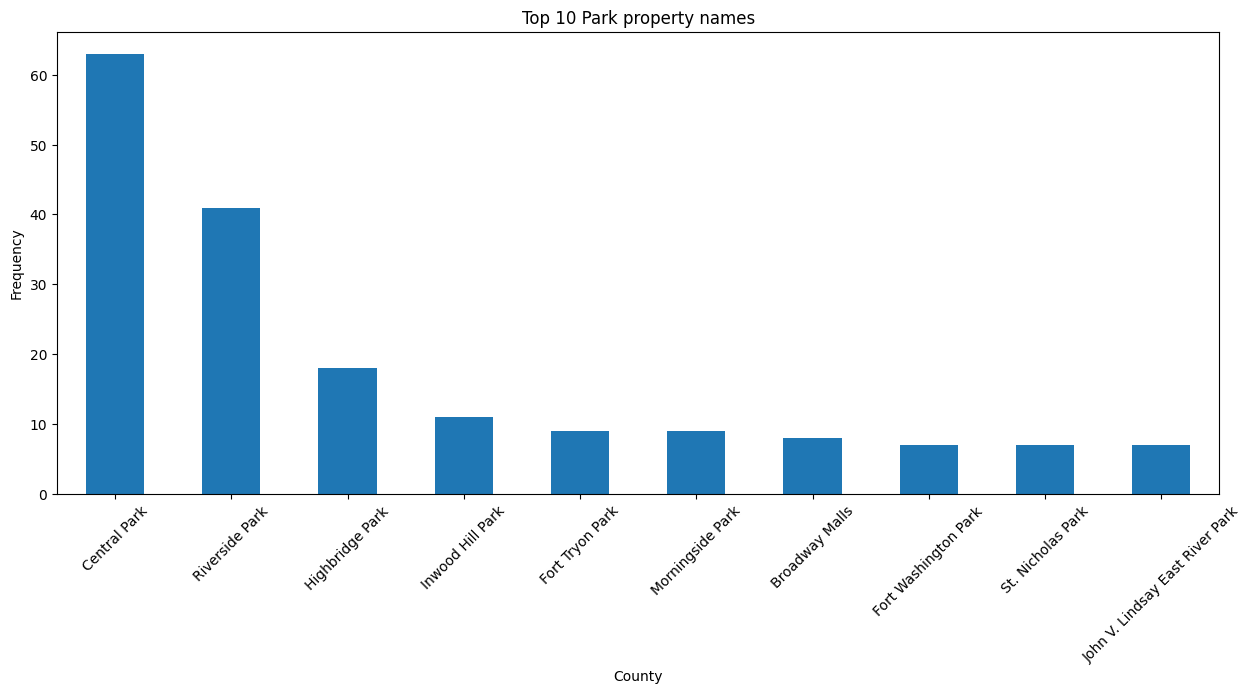

<Axes: title={'center': 'Top 10 Park property names'}, xlabel='County', ylabel='Frequency'>

In [12]:
# Get the top N most frequent counties
top_parks= manhattan_park_gdf['propname'].value_counts(dropna=False).nlargest(10)

# Plot the bar chart for the top 10 counties
top_10_parks=top_parks.plot(kind='bar', figsize=(15, 6))
plt.xlabel('County')
plt.ylabel('Frequency')
plt.title('Top 10 Park property names')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
top_10_parks

In [13]:
manhattan_park_gdf_description=manhattan_park_gdf['description'].value_counts()
manhattan_park_gdf_description

description
Sutton Place Pk-Sutton Place Park                       5
Central Park West                                       4
Washington Square Park-Washington Square Park           3
Tompkins Square Park-Tompkins Square Park               2
Morningside Park-Morningside Park                       2
                                                       ..
Central Park-The Pool                                   1
Jackie Robinson Park-Playground One Fifty Two Clii      1
Central Park-Heckscher Ballfields & Playground          1
Central Park-Dairy, Chess & Checkers House, Carousel    1
Riverside Park-Hippo Playground                         1
Name: count, Length: 243, dtype: int64

In [14]:
manhattan_park_gdf['propname'].value_counts()

propname
Central Park                       63
Riverside Park                     41
Highbridge Park                    18
Inwood Hill Park                   11
Fort Tryon Park                     9
Morningside Park                    9
Broadway Malls                      8
Fort Washington Park                7
St. Nicholas Park                   7
John V. Lindsay East River Park     7
Riverside Park South                6
Marcus Garvey Park                  6
East River Walk                     5
Wards Island Park                   5
Sutton Parks                        5
Battery Park City                   5
Washington Square Park              5
Sara D. Roosevelt Park              4
The Battery                         4
Randall's Island Park               4
Harlem River Park                   3
Carl Schurz Park                    3
Tompkins Square Park                2
The High Line                       2
Isham Park                          2
Jackie Robinson Park                2
Tho

In [15]:
manhattan_park_gdf["area"] = manhattan_park_gdf.area
manhattan_park_gdf["area"]

C:\Users\Justh\AppData\Local\Temp\ipykernel_18136\1630699224.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  manhattan_park_gdf["area"] = manhattan_park_gdf.area
c:\Users\Justh\anaconda3\envs\comp47360\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


0      1.210411e-05
2      6.392905e-06
3      4.594514e-06
4      1.288137e-07
5      2.152708e-06
           ...     
909    1.316624e-06
911    4.373282e-06
912    1.025622e-07
913    6.229324e-07
919    2.279076e-07
Name: area, Length: 255, dtype: float64

<Axes: >

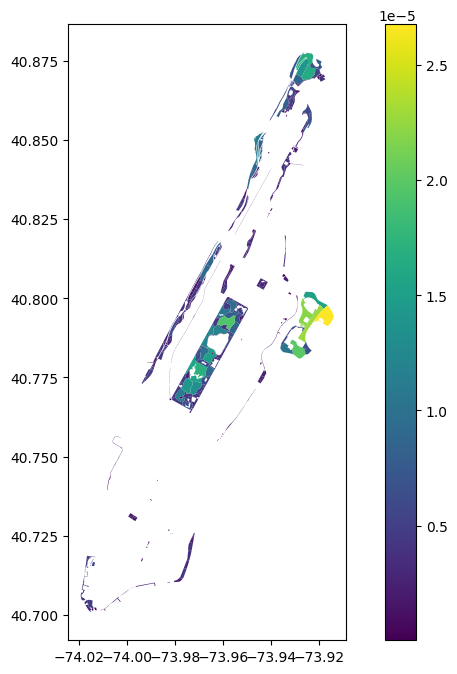

In [16]:
manhattan_park_gdf.plot("area",figsize=(10,8),legend=True)


In [17]:
import folium 
import matplotlib.pyplot as plt
import mapclassify


In [18]:
print(manhattan_park_gdf.geometry.name)

geometry


In [19]:
manhattan_park_gdf.explore("area", legend=True)

In [20]:
manhattan_park_gdf

propname retireddate     zipcode        acres  \
0              Central Park        None       10024  28.25502865   
2              Central Park        None       10024  13.68595728   
3              Central Park        None  1002410025  11.00554979   
4              Sutton Parks        None       10022    0.3048409   
5    Washington Square Park        None       10011    4.9406729   
..                      ...         ...         ...          ...   
909    Riverside Park South        None       10023   3.04983934   
911            Central Park        None       10023   9.97552183   
912       Park Avenue Malls        None       10029   0.23787662   
913             The Battery        None       10004   2.63462252   
919          Riverside Park        None       10024   0.59861947   

                                              location nys_assembly  \
0    West Drive To 92 St, Reservoir, East Drive, 97...       69, 68   
2            Reservoir, 90 St, 5 Ave, 97 St Transverse       69, 68   
3                   CPW, W 97 St, West Drive, W 100 St       69, 68   
4                           E 53 To E 54 St, Sutton Pl           73   
5    W 4th St, Waverly Pl, University Pl (E/o 5 Ave...           66   
..                                                 ...          ...   
909  67 St To 72 St, Riverside Blvd To Middle Roadw...           67   
911                  West Drive, CPW, 65 St Transverse           75   
912                           Park Ave, E96 St, E97 St         Null   
913            Peter Minuit Pl, State St, Whitehall St           65   
919                             W 91 St & Riverside Dr           69   

    councildistrict                                        description  \
0                 6                 Central Park-Reservoir (Northwest)   
2                 6                 Central Park-Reservoir (Northeast)   
3                 6                                  Central Park West   
4                 4                  Sutton Place Pk-Sutton Place Park   
5                 1                Washington Square Park Eastern Half   
..              ...                                                ...   
909               6  Riverside Park South-North Riverside Blvd and ...   
911               6                                  Central Park West   
912               4                     Park Avenue Malls Sitting Area   
913               1                    Battery Park-Peter Minuit Plaza   
919               6                    Riverside Park-Hippo Playground   

    us_congress gispropnum  ... communityboard department subcategory  \
0        10, 13       M010  ...            164       M-13        None   
2        10, 13       M010  ...            164       M-13        None   
3        10, 13       M010  ...            164       M-13        None   
4            12      M108P  ...            106       M-06        None   
5            10       M098  ...            102       M-02        None   
..          ...        ...  ...            ...        ...         ...   
909          10       M353  ...            107       M-14        None   
911          10       M010  ...            164       M-13        None   
912        Null      M060C  ...            111       M-11        None   
913          10       M005  ...            101       M-01        None   
919          10       M071  ...            107       M-14        None   

    precinct  omppropid sitename nys_senate borough  \
0         22  M010-ZN34     None         29       M   
2          3  M010-ZN33     None         29       M   
3         22  M010-ZN35     None         29       M   
4         17   M108P-03     None         28       M   
5          3  M098-ZN02     None         27       M   
..       ...        ...      ...        ...     ...   
909       20  M353-ZN02     None     27, 31       M   
911        2  M010-ZN08     None         29       M   
912       23   M060C-01     None       Null       M   
913        1    M005-06     None 

In [21]:
#manhattan_park_gdf.to_file('manhattan_parks.geojson',driver='GeoJSON')